Loading the Datset

In [ ]:
import kagglehub
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/stock-market-dataset


In [ ]:
import os
for file in os.listdir(path):
    print(file)

stocks_folder = os.path.join(path, "stocks")
for file in os.listdir(stocks_folder):
    print(file)

Streaming output truncated to the last 5000 lines.
LEVI.csv
RBCAA.csv
GBAB.csv
CALB.csv
EGP.csv
HMNF.csv
MKSI.csv
WIRE.csv
EPAC.csv
WBS.csv
CNXM.csv
DGAZ.csv
NRGX.csv
CPAH.csv
SRCL.csv
ANGI.csv
KO.csv
BA.csv
EDRY.csv
BOX.csv
HCA.csv
ORGS.csv
MCC.csv
RUSHA.csv
IIN.csv
VAC.csv
EVY.csv
TG.csv
DHY.csv
DISH.csv
WEBK.csv
GGN.csv
AAPL.csv
GCE.csv
TC.csv
THCA.csv
MCX.csv
FITBO.csv
ATO.csv
CFMS.csv
PFN.csv
MIDD.csv
HPI.csv
CPSI.csv
WAFD.csv
CWBC.csv
AOSL.csv
BCRX.csv
HRI.csv
GCBC.csv
FCNCA.csv
TGA.csv
ARCC.csv
JSM.csv
TGE.csv
BKK.csv
MOR.csv
UCHF.csv
ARKR.csv
JRSH.csv
HPE.csv
ANCN.csv
UNVR.csv
HTZ.csv
NPO.csv
GCP.csv
AUB.csv
SLAB.csv
CNK.csv
SURF.csv
XFLT.csv
TWST.csv
CCO.csv
RM.csv
ALTG.csv
INSE.csv
CCLP.csv
BPMC.csv
NGHCO.csv
MSBF.csv
LRCX.csv
RTIX.csv
BWEN.csv
PT.csv
JBLU.csv
PAACU.csv
ALIM.csv
TFC.csv
PCTY.csv
TRC.csv
MGYR.csv
CHH.csv
UBSI.csv
PRQR.csv
FSRVU.csv
QD.csv
MFIN.csv
NEWA.csv
RC.csv
TMST.csv
GLQ.csv
CAAS.csv
HTGM.csv
OVV.csv
AMH.csv
CFRX.csv
VSAT.csv
INFU.csv
XRX.csv
FTNT.csv
NGD

In [ ]:
import pandas as pd
df = pd.read_csv(os.path.join(stocks_folder, "AAPL.csv"))
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400


Close Prices and Sale

In [ ]:
close_prices = df[['Close']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

Creating sequences

In [ ]:
import numpy as np

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)


Train-Test Split and reshaping model

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for RNN models
X_train = X_train.reshape(-1, seq_len, 1)
X_test = X_test.reshape(-1, seq_len, 1)


Training For RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

rnn_model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

history = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 9.3879e-04 - val_loss: 0.0027
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.5186e-06 - val_loss: 0.0017
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.3663e-06 - val_loss: 6.4262e-04
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.7258e-06 - val_loss: 3.9559e-04
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3.1162e-06 - val_loss: 8.1511e-04
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.8648e-06 - val_loss: 3.3045e-04
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.4743e-06 - val_loss: 2.0705e-04
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2.8032e-06 - val_loss: 2.0150e-04
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 2.0556e-06 - val_loss: 5.7724e-04
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.1792e-06 - val_loss: 4.8693e-04
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - l

Plotting Loss curve

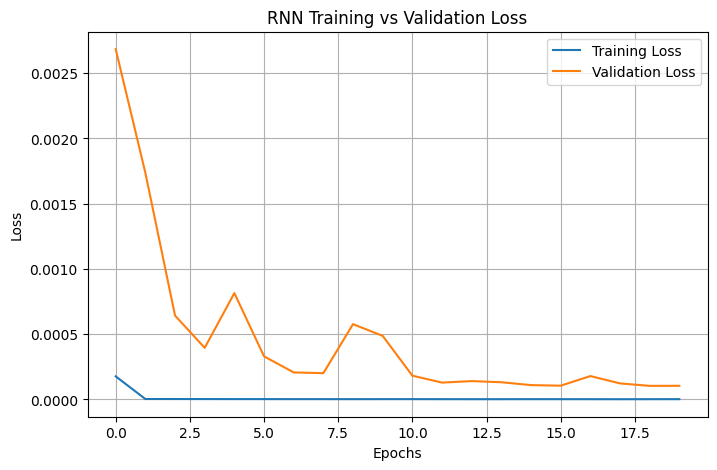

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Predicted Vs. Actual Stock Prices

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


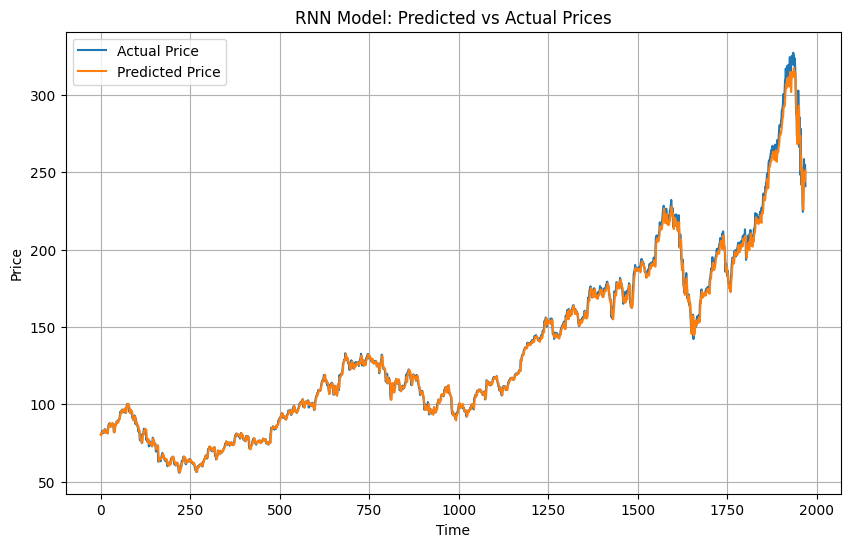

In [ ]:
predicted = rnn_model.predict(X_test)

# Inverse scaling
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("RNN Model: Predicted vs Actual Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Evaluate Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
r2 = r2_score(actual_prices, predicted_prices)

print(f" RNN Model Evaluation:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


 RNN Model Evaluation:
MAE  = 2.0690
RMSE = 3.3444
R²   = 0.9966


Building and Training LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 1.9227e-04 - val_loss: 3.7743e-04
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 5.8684e-06 - val_loss: 8.5589e-04
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 6.0283e-06 - val_loss: 5.2249e-04
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 4.0636e-06 - val_loss: 3.3017e-04
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 4.2929e-06 - val_loss: 2.0119e-04
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 4.4484e-06 - val_loss: 2.5432e-04
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 3.4809e-06 - val_loss: 3.7363e-04
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 3.7663e-06 - val_loss: 1.8021e-04
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 3.0619e-06 - val_loss: 5.3990e-04
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 3.7567e-06 - val_loss: 1.5755e-04
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step 

Plotting Loss Curve

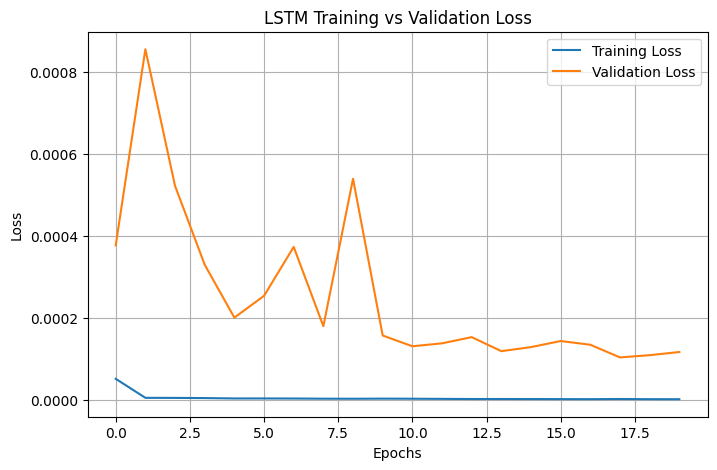

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Predict Prices

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


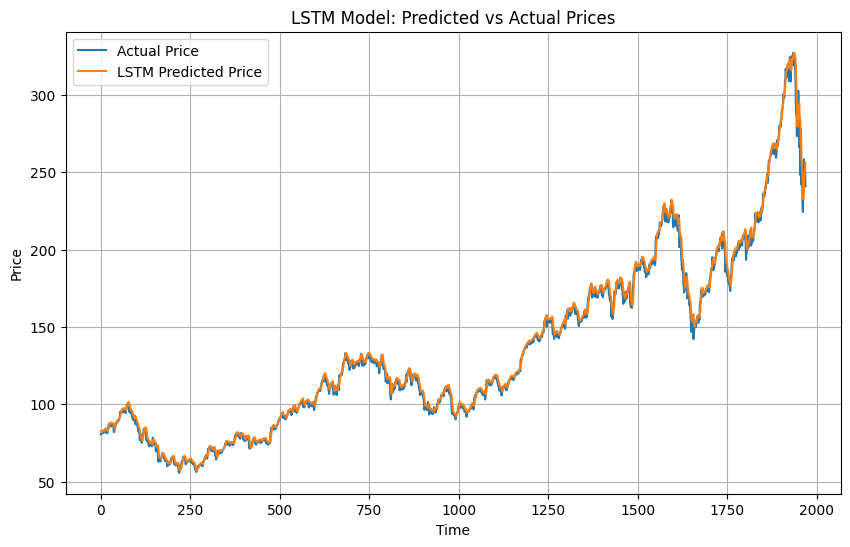

In [ ]:
# Predict
lstm_predicted = lstm_model.predict(X_test)

# Inverse scale
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted)
actual_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(lstm_predicted_prices, label="LSTM Predicted Price")
plt.title("LSTM Model: Predicted vs Actual Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Evaluate LSTM Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lstm_mae = mean_absolute_error(actual_prices, lstm_predicted_prices)
lstm_rmse = np.sqrt(mean_squared_error(actual_prices, lstm_predicted_prices))
lstm_r2 = r2_score(actual_prices, lstm_predicted_prices)

print(f" LSTM Model Evaluation:")
print(f"MAE  = {lstm_mae:.4f}")
print(f"RMSE = {lstm_rmse:.4f}")
print(f"R²   = {lstm_r2:.4f}")


 LSTM Model Evaluation:
MAE  = 2.3143
RMSE = 3.5413
R²   = 0.9962


Building and Training GRU

In [ ]:
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential([
    GRU(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mean_squared_error')

gru_history = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 2.7020e-04 - val_loss: 1.4318e-04
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 2.7709e-06 - val_loss: 1.4476e-04
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 2.1759e-06 - val_loss: 1.5582e-04
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 2.5378e-06 - val_loss: 1.5338e-04
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 2.8089e-06 - val_loss: 1.0858e-04
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 2.1784e-06 - val_loss: 1.0738e-04
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 2.1817e-06 - val_loss: 1.0684e-04
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 2.0834e-06 - val_loss: 1.1073e-04
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 2.0885e-06 - val_loss: 1.3051e-04
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 1.6976e-06 - val_loss: 9.1701e-05
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/st

GRU LOSS CURVE

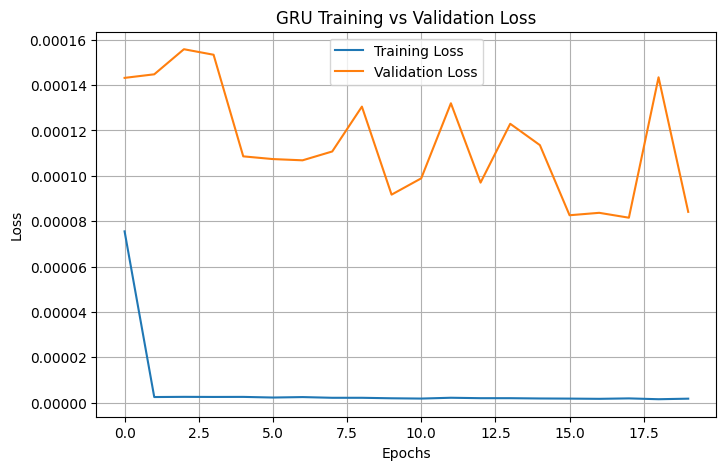

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Predictions vs. Actual Prices

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


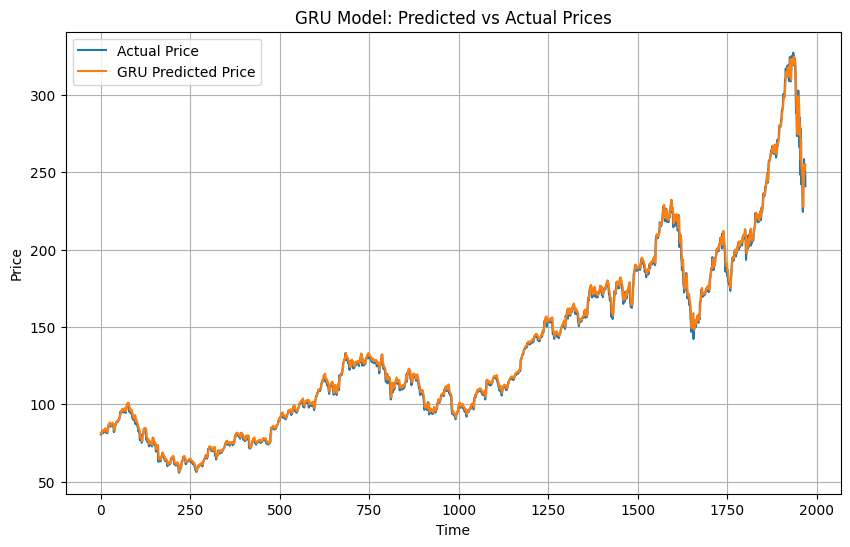

In [ ]:
gru_predicted = gru_model.predict(X_test)

# Inverse transform
gru_predicted_prices = scaler.inverse_transform(gru_predicted)
actual_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(gru_predicted_prices, label="GRU Predicted Price")
plt.title("GRU Model: Predicted vs Actual Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gru_mae = mean_absolute_error(actual_prices, gru_predicted_prices)
gru_rmse = np.sqrt(mean_squared_error(actual_prices, gru_predicted_prices))
gru_r2 = r2_score(actual_prices, gru_predicted_prices)

print(f" GRU Model Evaluation:")
print(f"MAE  = {gru_mae:.4f}")
print(f"RMSE = {gru_rmse:.4f}")
print(f"R²   = {gru_r2:.4f}")


 GRU Model Evaluation:
MAE  = 1.8393
RMSE = 2.9989
R²   = 0.9973
